In [ ]:
#4.1.1
import pandas as pd

!gdown https://drive.google.com/uc?id=18jAAq0KsW7p1J1_bWdJCm3vK_Uw7cgl6

data = pd.read_csv('teleCust1000t.csv')

summary_stats = data.describe()

data_info = data.info()

summary_stats, data_info


Downloading...
From: https://drive.google.com/uc?id=18jAAq0KsW7p1J1_bWdJCm3vK_Uw7cgl6
To: /content/teleCust1000t.csv
100% 37.0k/37.0k [00:00<00:00, 58.1MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


(          region       tenure          age      marital      address  \
 count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
 mean      2.0220    35.526000    41.684000     0.495000    11.551000   
 std       0.8162    21.359812    12.558816     0.500225    10.086681   
 min       1.0000     1.000000    18.000000     0.000000     0.000000   
 25%       1.0000    17.000000    32.000000     0.000000     3.000000   
 50%       2.0000    34.000000    40.000000     0.000000     9.000000   
 75%       3.0000    54.000000    51.000000     1.000000    18.000000   
 max       3.0000    72.000000    77.000000     1.000000    55.000000   
 
             income           ed       employ       retire       gender  \
 count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
 mean     77.535000     2.671000    10.987000     0.047000     0.517000   
 std     107.044165     1.222397    10.082087     0.211745     0.499961   
 min       9.000000     1.000000     0.00

In [ ]:
#4.1.2
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

data = pd.read_csv('teleCust1000t.csv')

missing_data = data.isnull().sum()

# (Mean)
mean_imputer = SimpleImputer(strategy='mean')
data_mean = data.copy()
data_mean.iloc[:, :] = mean_imputer.fit_transform(data_mean)

# (Median)
median_imputer = SimpleImputer(strategy='median')
data_median = data.copy()
data_median.iloc[:, :] = median_imputer.fit_transform(data_median)

# (KNN)
knn_imputer = KNNImputer(n_neighbors=5)
data_knn = data.copy()
data_knn.iloc[:, :] = knn_imputer.fit_transform(data_knn)

missing_data, data_mean.isnull().sum(), data_median.isnull().sum(), data_knn.isnull().sum()


(region     0
 tenure     0
 age        0
 marital    0
 address    0
 income     0
 ed         0
 employ     0
 retire     0
 gender     0
 reside     0
 custcat    0
 dtype: int64,
 region     0
 tenure     0
 age        0
 marital    0
 address    0
 income     0
 ed         0
 employ     0
 retire     0
 gender     0
 reside     0
 custcat    0
 dtype: int64,
 region     0
 tenure     0
 age        0
 marital    0
 address    0
 income     0
 ed         0
 employ     0
 retire     0
 gender     0
 reside     0
 custcat    0
 dtype: int64,
 region     0
 tenure     0
 age        0
 marital    0
 address    0
 income     0
 ed         0
 employ     0
 retire     0
 gender     0
 reside     0
 custcat    0
 dtype: int64)

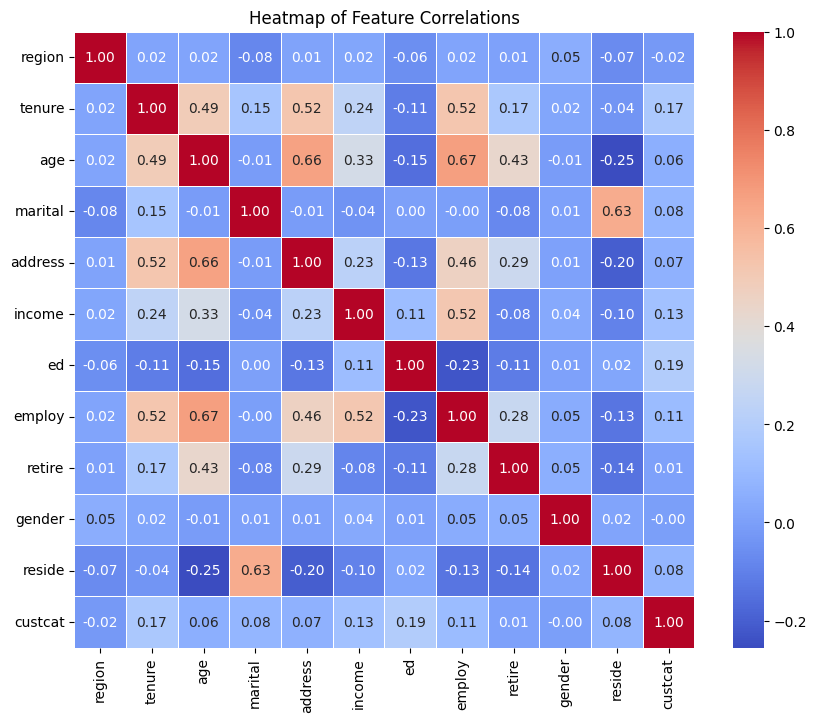

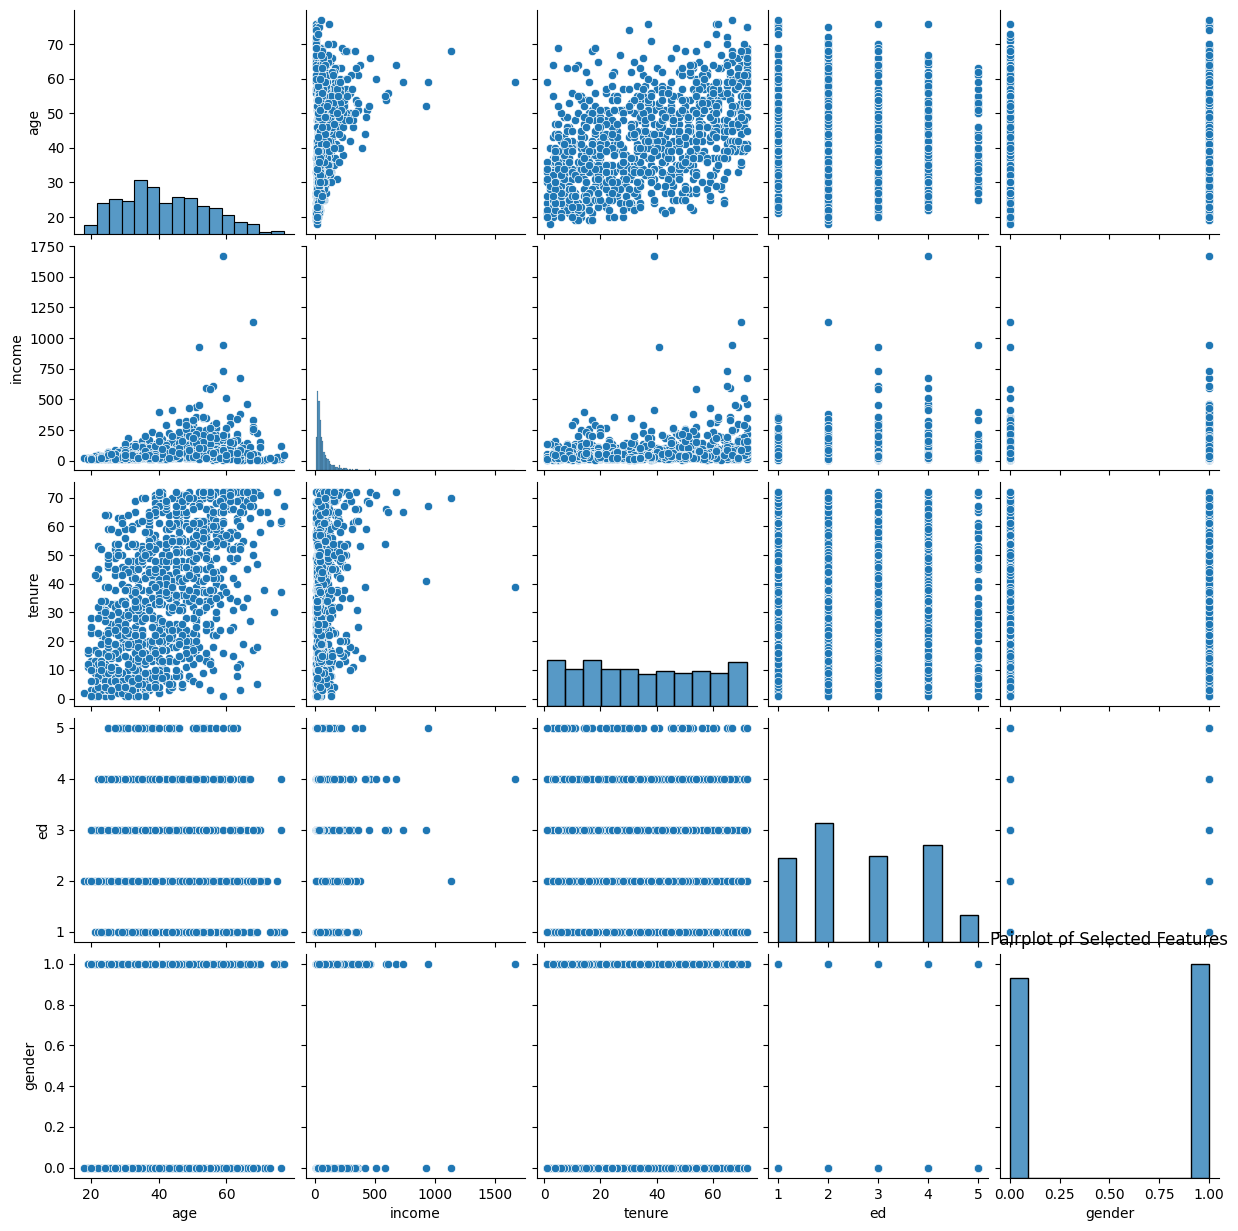

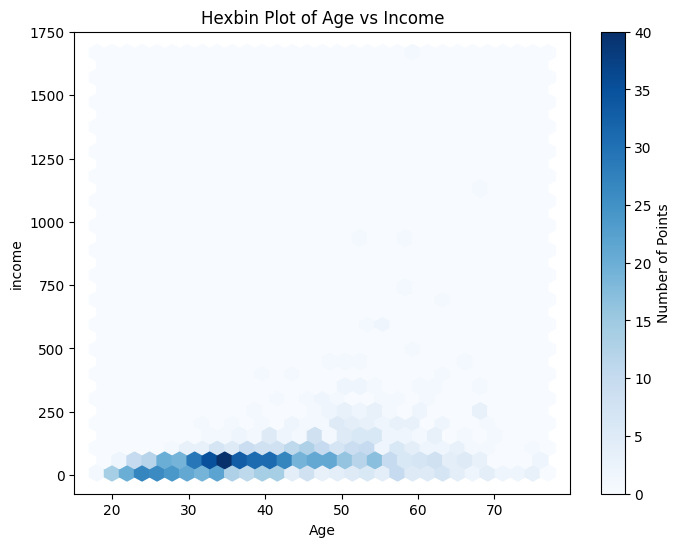

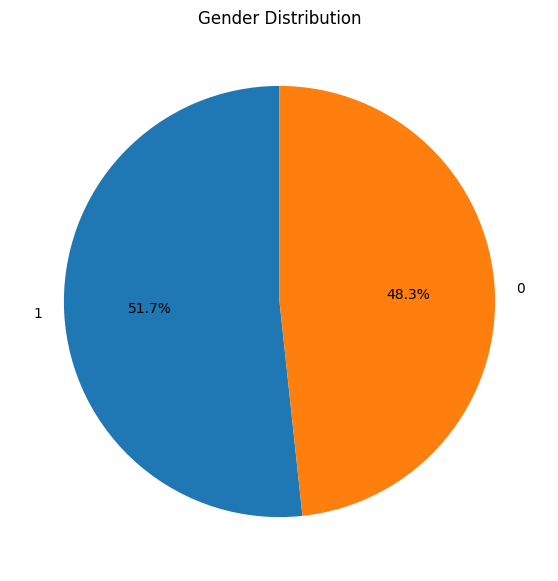

/tmp/ipython-input-4019682986.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='marital', data=data, palette='Set2')


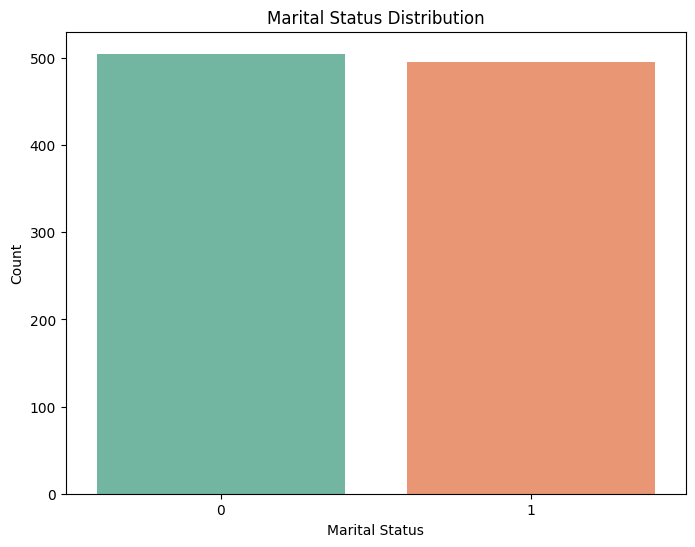

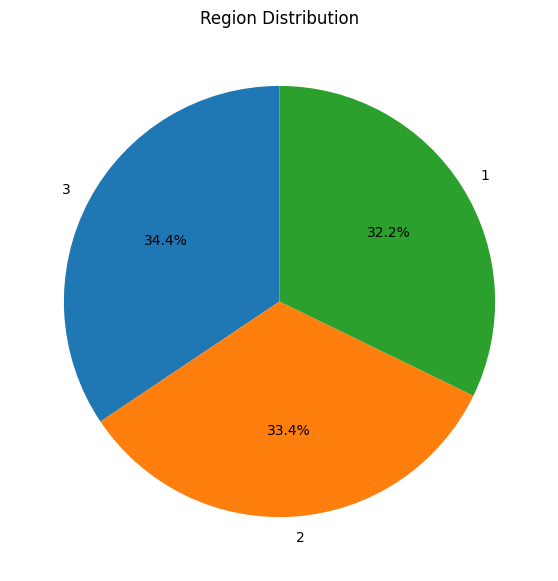

/tmp/ipython-input-4019682986.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ed', data=data, palette='Set2')


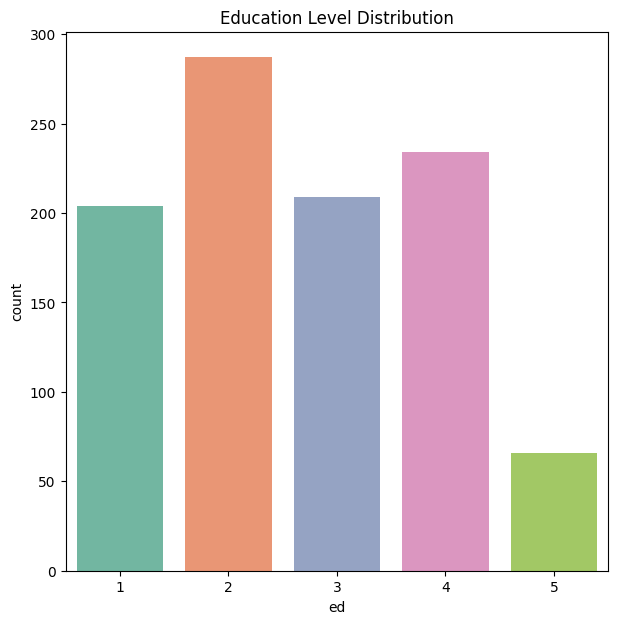

/tmp/ipython-input-4019682986.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='retire', data=data, palette='Set2')


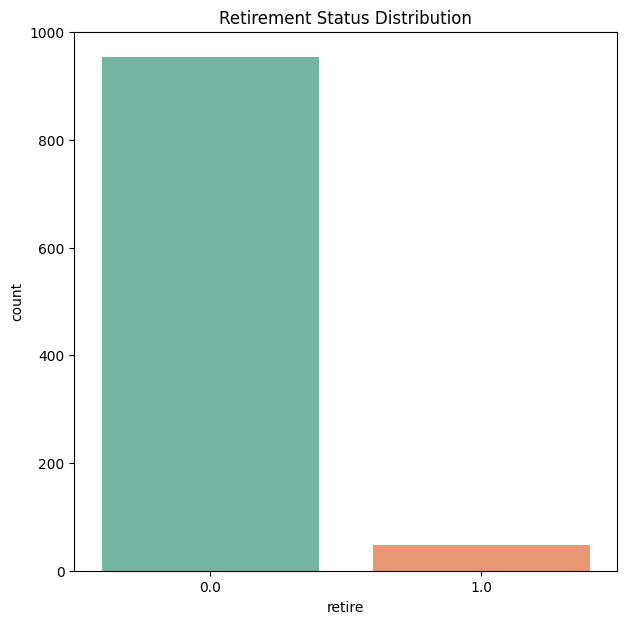

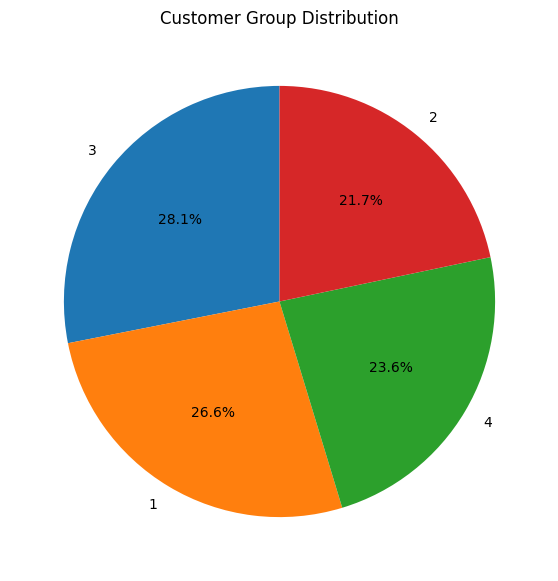

In [ ]:
#4.1.4
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

data = pd.read_csv('teleCust1000t.csv')

# 1 Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

# 2 Pairplot
# age, income
sns.pairplot(data[['age', 'income', 'tenure', 'ed', 'gender']])
plt.title('Pairplot of Selected Features')
plt.show()

# 3 Hexbin
# age ,income
plt.figure(figsize=(8, 6))
plt.hexbin(data['age'], data['income'], gridsize=30, cmap='Blues')
plt.colorbar(label='Number of Points')
plt.title('Hexbin Plot of Age vs Income')
plt.xlabel('Age')
plt.ylabel('income')
plt.show()

# 4
# Pie Chart (gender)
gender_count = data['gender'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

# Countplot (marital)
plt.figure(figsize=(8, 6))
sns.countplot(x='marital', data=data, palette='Set2')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Pie Chart (region)
region_count = data['region'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(region_count, labels=region_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Region Distribution')
plt.show()

# Countplot (education)
plt.figure(figsize=(7, 7))
sns.countplot(x='ed', data=data, palette='Set2')
plt.title('Education Level Distribution')
plt.show()

# Countplot (retire)
plt.figure(figsize=(7, 7))
sns.countplot(x='retire', data=data, palette='Set2')
plt.title('Retirement Status Distribution')
plt.show()

# Pie Chart (cutcast)
custcat_count = data['custcat'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(custcat_count, labels=custcat_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Group Distribution')
plt.show()


In [ ]:
#4.2
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv('teleCust1000t.csv')

# 1 (Label Encoding)
categorical_features = ['region', 'marital', 'address', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']

label_encoder = LabelEncoder()

for col in categorical_features:
    data[col] = label_encoder.fit_transform(data[col])

# 2 normalization
numeric_features = data.columns

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])


# 3 delete reside
data = data.drop(columns=['reside'])

data.head()


region    tenure       age   marital   address    income        ed  \
0 -0.026968 -1.055125  0.184505  1.010051 -0.253028 -0.126506  1.087753   
1  1.198836 -1.148806 -0.691812  1.010051 -0.452027  0.546450  1.906227   
2  1.198836  1.521092  0.821826  1.010051  1.239468  0.359517 -1.367671   
3 -0.026968 -0.118319 -0.691812 -0.990050  0.045471 -0.416251 -0.549196   
4 -0.026968 -0.586722 -0.930808  1.010051 -0.253028 -0.444291 -1.367671   

     employ    retire    gender   custcat  
0 -0.594970 -0.222076 -1.034598 -1.327980  
1 -0.594970 -0.222076 -1.034598  1.351199  
2  1.793669 -0.222076  0.966559  0.458140  
3 -1.092603 -0.222076  0.966559 -1.327980  
4 -0.893550 -0.222076 -1.034598  0.458140

In [ ]:
#4.3.1
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['custcat'])
y = data['custcat']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

lasso_selected_features = X.columns[lasso.coef_ != 0]

# 2.RFE
rfe = RFE(estimator=Lasso(), n_features_to_select=None)
rfe.fit(X_train, y_train)

rfe_selected_features = X.columns[rfe.support_]

print("Features selected by Lasso Regression:", lasso_selected_features)
print("Features selected by RFE:", rfe_selected_features)


Features selected by Lasso Regression: Index(['tenure', 'ed'], dtype='object')
Features selected by RFE: Index(['income', 'ed', 'employ', 'retire', 'gender'], dtype='object')


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


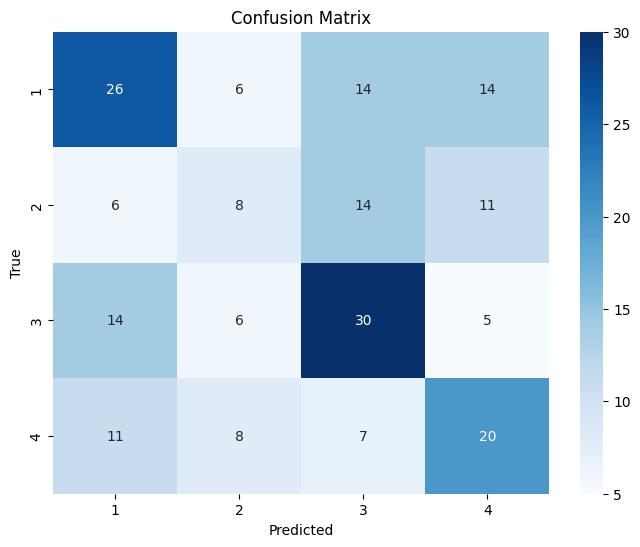

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


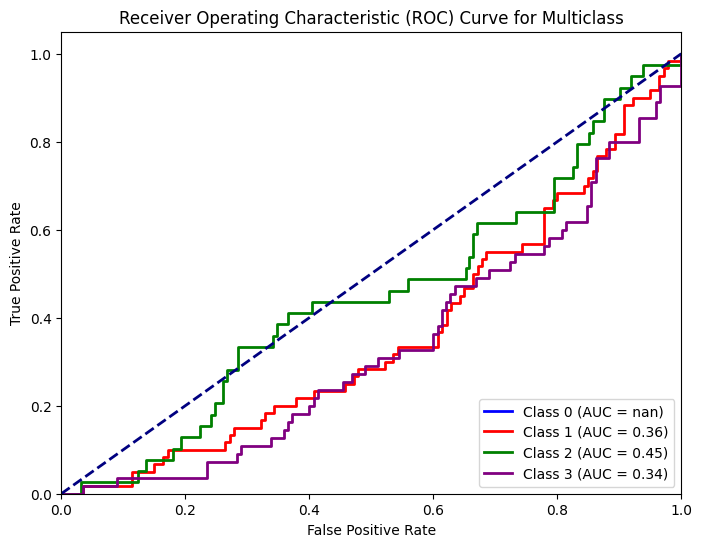

### Evaluation on Test Data ###
Accuracy of Logistic Regression model on test data: 0.42
Confusion Matrix (Test Data):
[[26  6 14 14]
 [ 6  8 14 11]
 [14  6 30  5]
 [11  8  7 20]]
Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.46      0.43      0.44        60
           2       0.29      0.21      0.24        39
           3       0.46      0.55      0.50        55
           4       0.40      0.43      0.42        46

    accuracy                           0.42       200
   macro avg       0.40      0.40      0.40       200
weighted avg       0.41      0.42      0.41       200


Area Under Curve (AUC) for each class:
Class 0: AUC = nan
Class 1: AUC = 0.36
Class 2: AUC = 0.45
Class 3: AUC = 0.34


In [ ]:
#4.3.2/3/4
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

X = data[['tenure', 'ed', 'income', 'retire', 'employ']]
y = data['custcat']
y = y.astype('category')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')

logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

# (Confusion Matrix)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=y.cat.categories, yticklabels=y.cat.categories)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(y.cat.categories)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], logreg.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
colors = ['blue', 'red', 'green', 'purple']
for i in range(len(y.cat.categories)):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='Class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()

print("### Evaluation on Test Data ###")
print("Accuracy of Logistic Regression model on test data:", accuracy_test)
print("Confusion Matrix (Test Data):")
print(conf_matrix_test)
print("Classification Report (Test Data):")
print(class_report_test)

print("\nArea Under Curve (AUC) for each class:")
for i in range(len(y.cat.categories)):
    print(f"Class {i}: AUC = {roc_auc[i]:.2f}")



In [ ]:
#4.3.5
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[['tenure', 'ed', 'income', 'retire', 'employ']]
y = data['custcat']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')
logreg.fit(X_train, y_train)

coefficients = pd.DataFrame(logreg.coef_, columns=X.columns)
coefficients


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


tenure        ed    income    retire    employ
0 -0.850712 -0.569257 -0.133382  0.136155 -0.089413
1  0.695269  0.392280 -0.061700 -0.140080 -0.180123
2  0.042468 -0.551591 -0.007032  0.024058  0.276125
3  0.098870  0.780453  0.059628 -0.097585 -0.003157

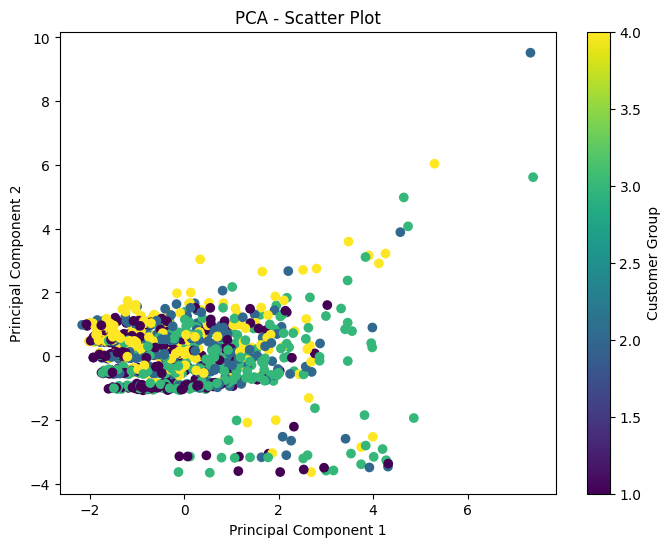

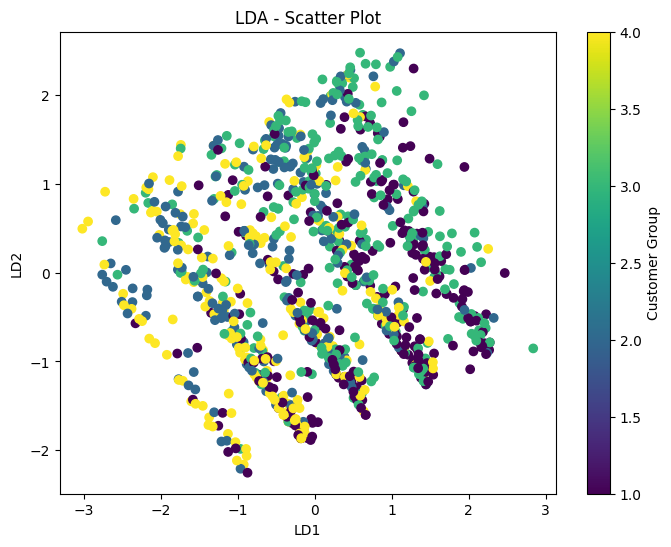

In [ ]:
#4.4.1
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

X = data[['tenure', 'ed', 'income', 'retire', 'employ']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1.PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['custcat'], cmap='viridis')
plt.title('PCA - Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Customer Group')
plt.show()

# 2. LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, data['custcat'])

plt.figure(figsize=(8,6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=data['custcat'], cmap='viridis')
plt.title('LDA - Scatter Plot')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.colorbar(label='Customer Group')
plt.show()


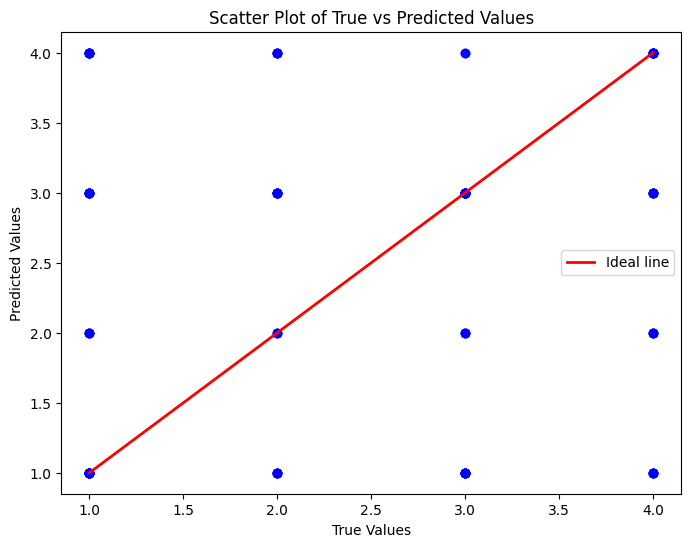

In [ ]:
#4.4.2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = data[['tenure', 'ed', 'income', 'retire', 'employ']]
y = data['custcat']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# MLP
mlp = MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000, activation='relu', solver='adam', random_state=42)

mlp.fit(X_train, y_train)

y_pred_test = mlp.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label="Ideal line")  # خط ایده‌آل
plt.title("Scatter Plot of True vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


Downloading...
From: https://drive.google.com/uc?id=1HG_gFSXwh5KJ6_JVyLgHglQgYtKsoFKF
To: /content/Housing.csv
100% 30.0k/30.0k [00:00<00:00, 72.9MB/s]
first 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4   

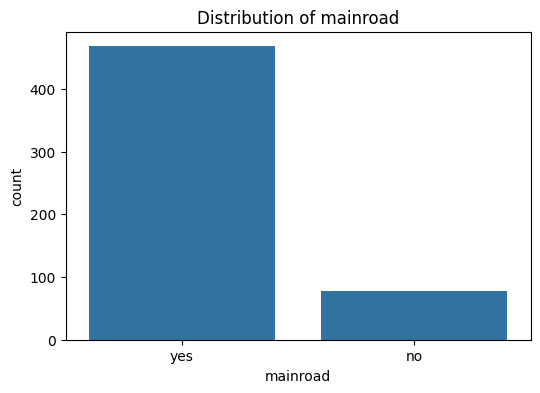

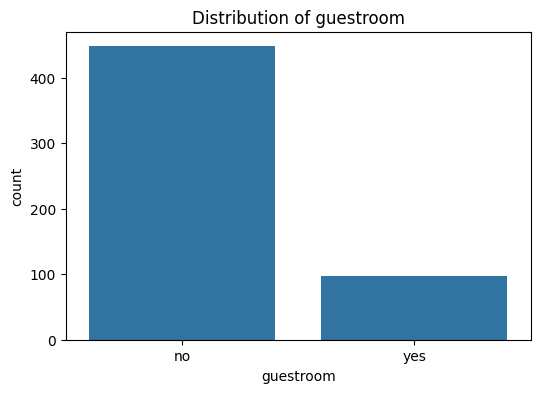

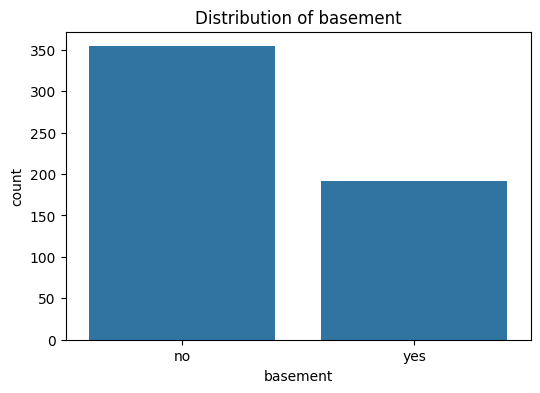

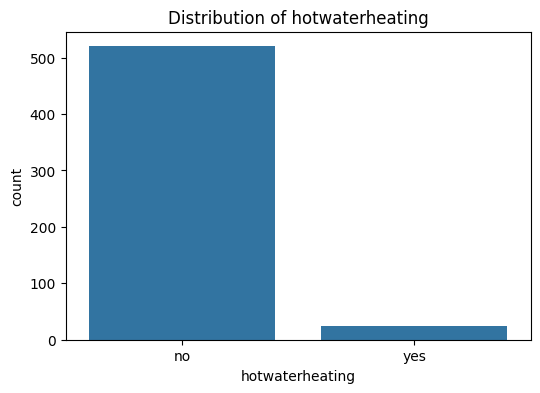

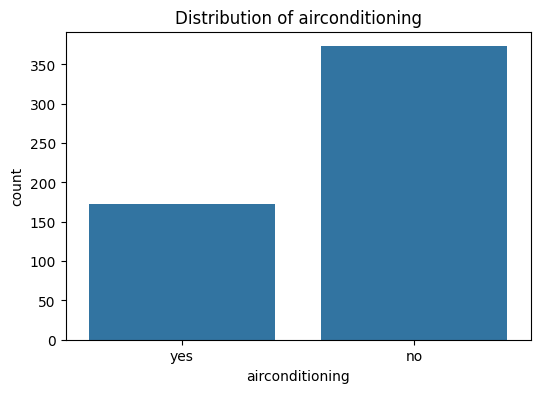

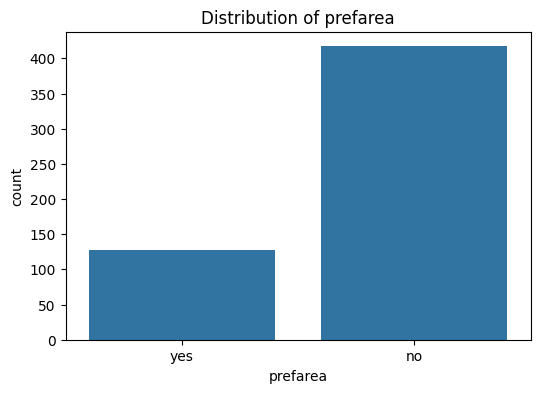

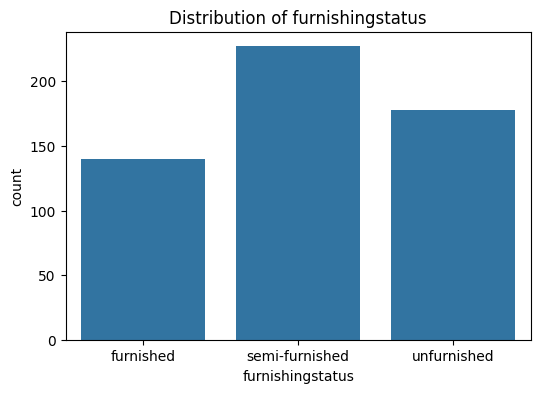

/tmp/ipython-input-1807332012.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[feature], kde=True)


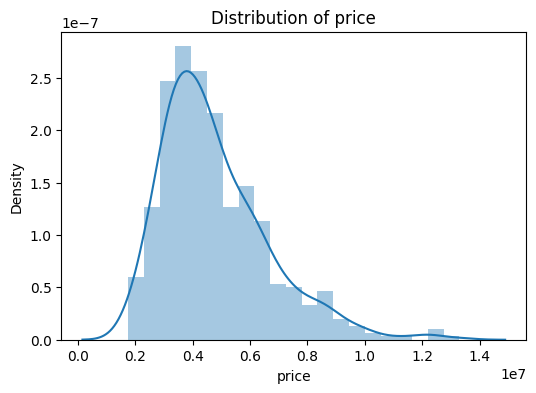

/tmp/ipython-input-1807332012.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[feature], kde=True)


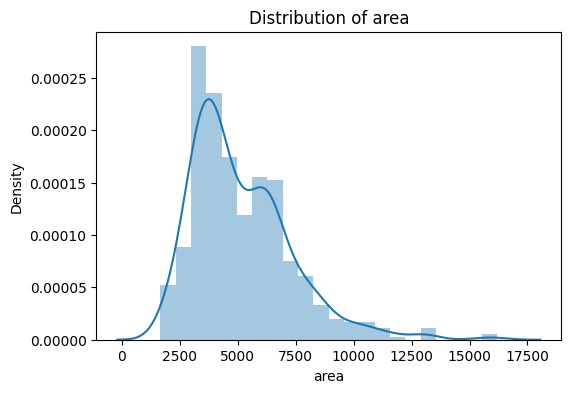

/tmp/ipython-input-1807332012.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[feature], kde=True)


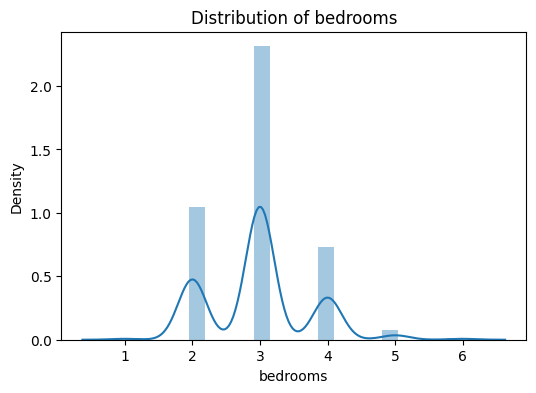

/tmp/ipython-input-1807332012.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[feature], kde=True)


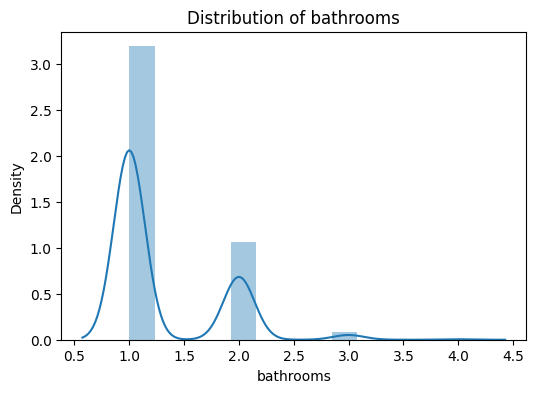

/tmp/ipython-input-1807332012.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[feature], kde=True)


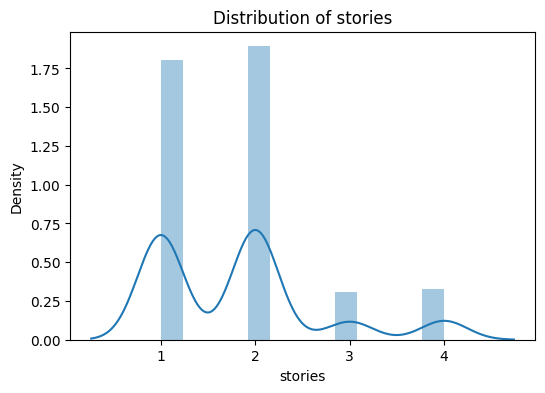

/tmp/ipython-input-1807332012.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[feature], kde=True)


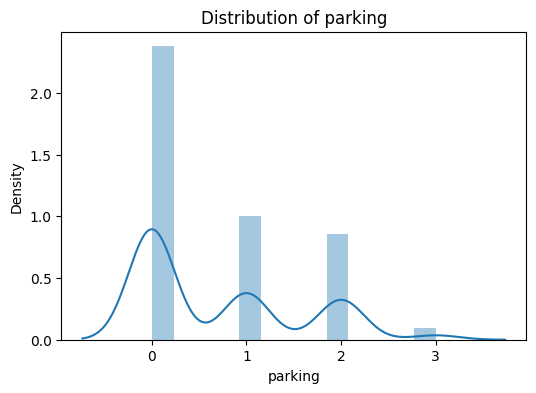

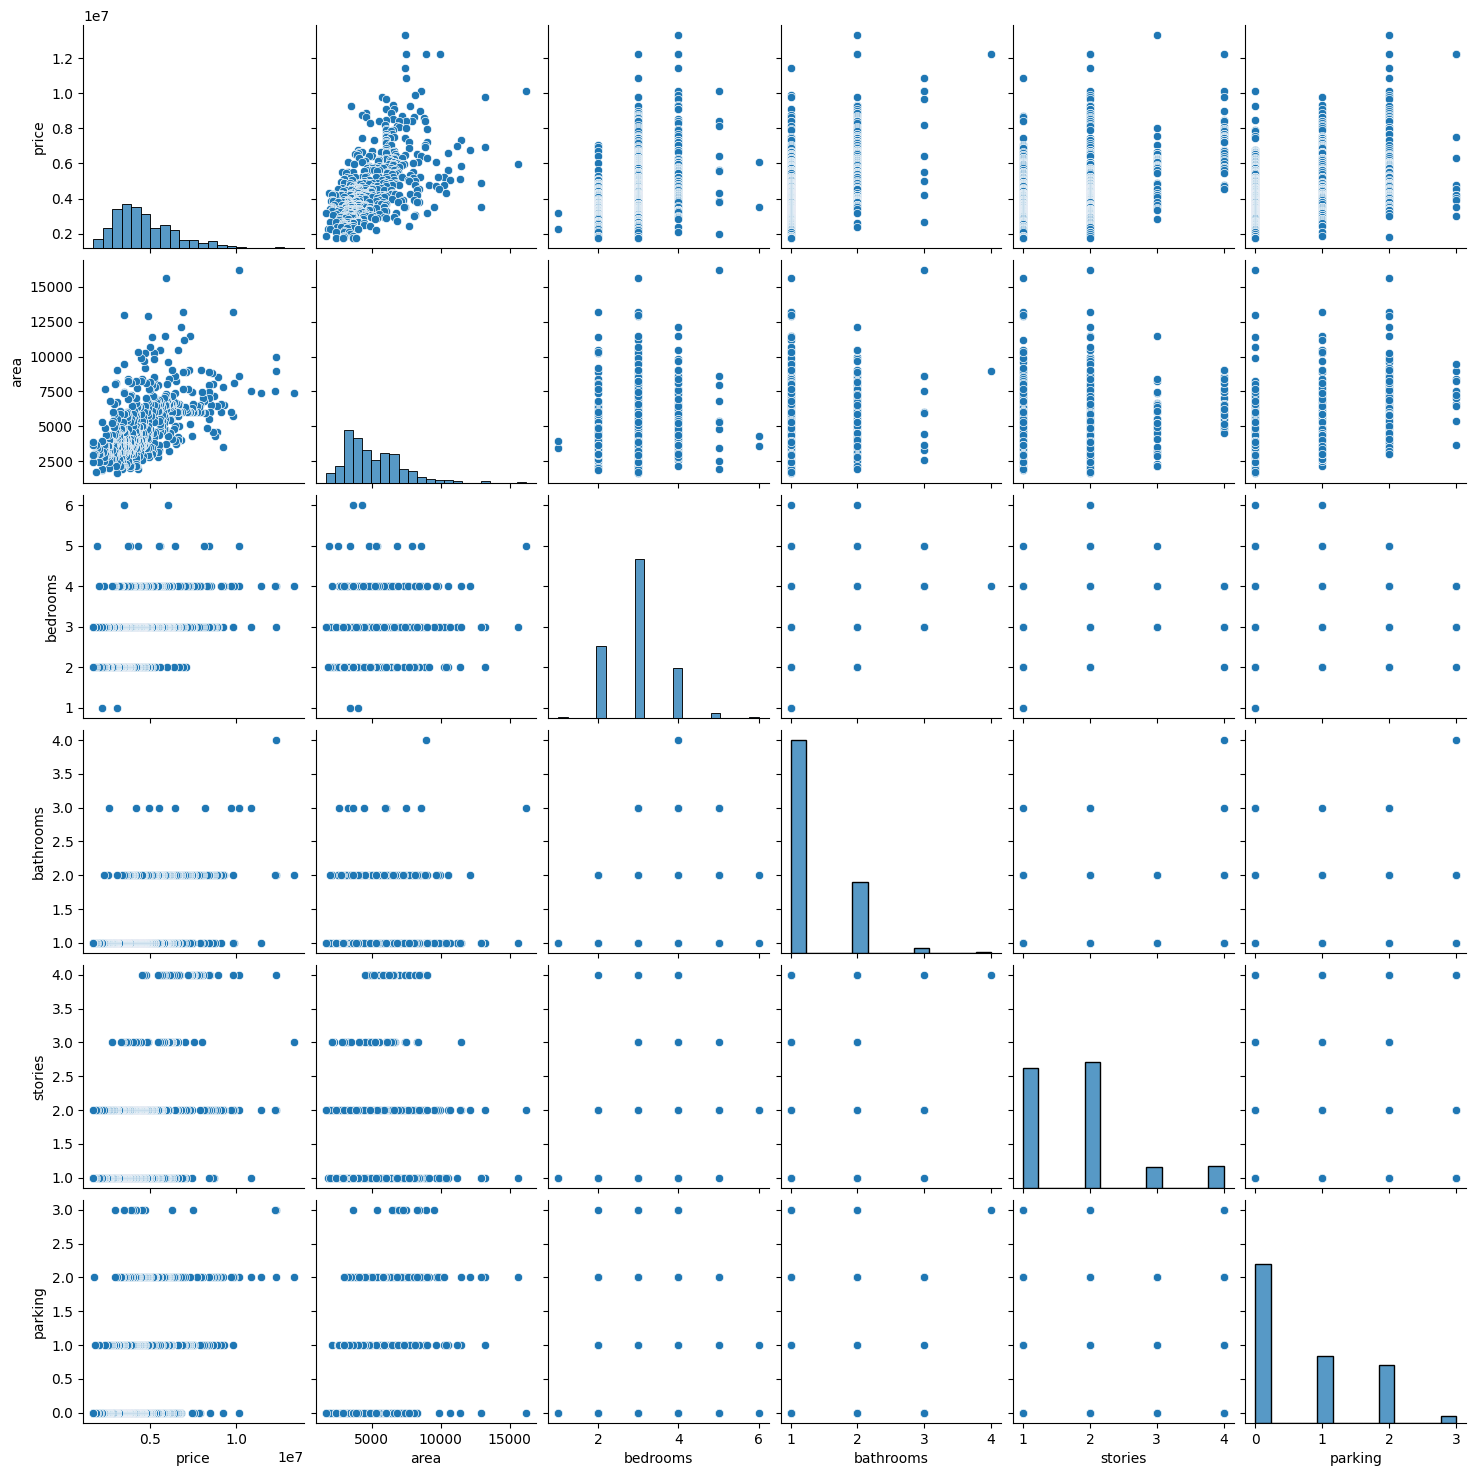

In [ ]:
#5.3
import gdown
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!gdown https://drive.google.com/uc?id=1HG_gFSXwh5KJ6_JVyLgHglQgYtKsoFKF

data2 = pd.read_csv('Housing.csv')

print("first 5 rows:")
print(data2.head())

print("\n information:")
data_info = data2.info()

numeric_features = data2.select_dtypes(include='number').columns
categorical_features = data2.select_dtypes(include='object').columns

print("\n numeric_feature:")
print(numeric_features)

print("\n categorical_features")
print(categorical_features)

for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=feature, data=data2)
    plt.title(f'Distribution of {feature}')
    plt.show()

for feature in numeric_features:
    plt.figure(figsize=(6,4))
    sns.distplot(data2[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

sns.pairplot(data2)
plt.show()


In [ ]:
#5.4.1
duplicates = data2.duplicated().sum()

if duplicates > 0:
    print(f"number of repeated rows: {duplicates}")
    data2 = data2.drop_duplicates()
    print("repeated rows deleted.")
else:
    print("there is no repeated row.")


there is no repeated row.


In [ ]:
#5.4.3
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

categorical_columns_label_encoding = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

categorical_columns_one_hot_encoding = ['furnishingstatus']

encoder = LabelEncoder()

for column in categorical_columns_label_encoding:
    data2[column] = encoder.fit_transform(data2[column])

encoder_one_hot = OneHotEncoder(drop=None, sparse_output=False)

encoded_furnishingstatus = encoder_one_hot.fit_transform(data2[categorical_columns_one_hot_encoding])

encoded_furnishingstatus_df = pd.DataFrame(encoded_furnishingstatus, columns=encoder_one_hot.get_feature_names_out(categorical_columns_one_hot_encoding))

data2 = pd.concat([data2, encoded_furnishingstatus_df], axis=1)

data2 = data2.drop(columns=categorical_columns_one_hot_encoding)

print(data2.head())


      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0                         1.0                              0.0   
1                         

In [ ]:
#5.4.4
Q1 = data2[numeric_features].quantile(0.25)
Q3 = data2[numeric_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data2_no_outliers = data2[~((data2[numeric_features] < lower_bound) | (data2[numeric_features] > upper_bound)).any(axis=1)]

print(data2_no_outliers.shape)


(463, 15)


In [ ]:
#5.4.5/6
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data2_no_outliers.drop(columns=['price'])
y = data2_no_outliers['price']  # goal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")


Training data shape: (370, 14)
Test data shape: (93, 14)


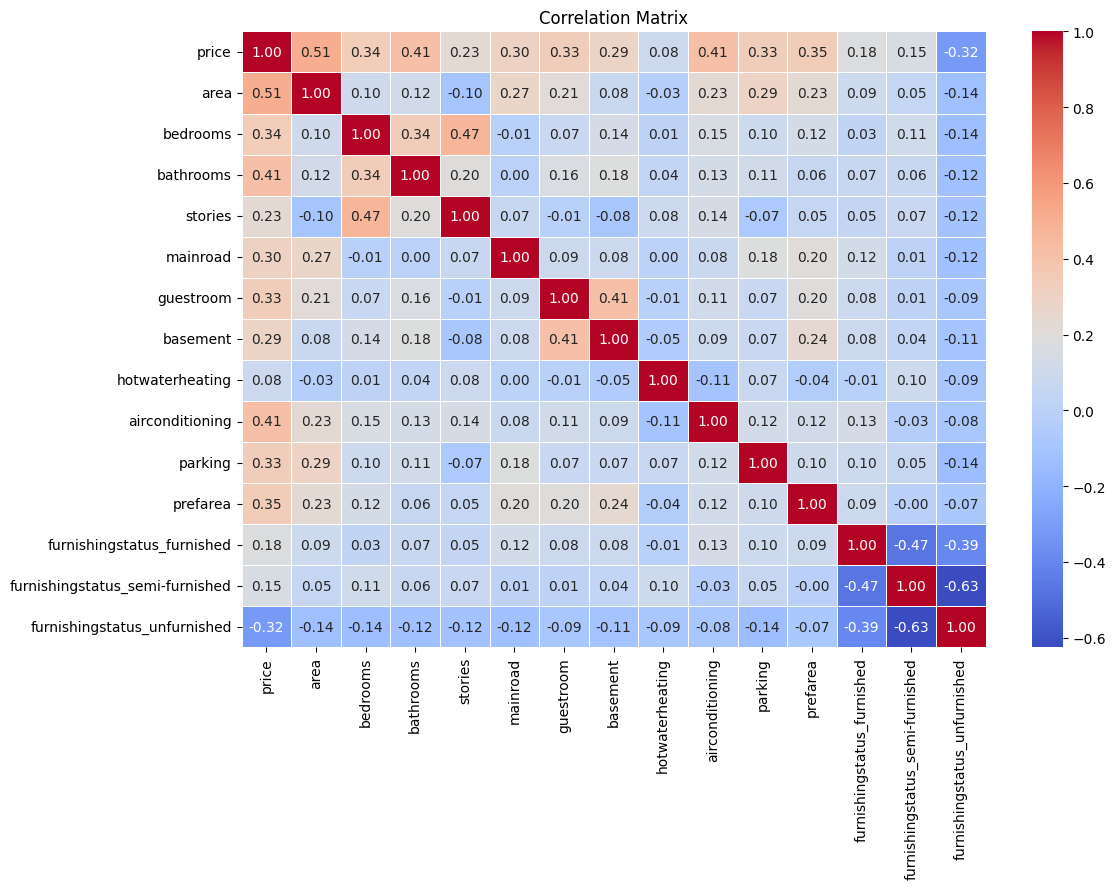

Number of components selected by PCA: 12
        area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  -0.315964 -0.332089  -0.295684 -0.206766 -0.237776  -0.293686 -0.286863   
1  -0.208857  0.272505   0.157997  0.342365 -0.220956  -0.243347 -0.199952   
2   0.246418 -0.435796  -0.307059 -0.433255  0.209265   0.050730 -0.015735   
3  -0.008476 -0.058472  -0.113258  0.166508  0.214198  -0.386005 -0.443646   
4  -0.439750 -0.110476  -0.081264 -0.081994 -0.248148   0.186979  0.322222   
5  -0.123078 -0.041176   0.301771 -0.021093 -0.010831   0.261481  0.212871   
6  -0.152227  0.020421  -0.283173  0.349577  0.459803  -0.021835  0.005592   
7  -0.205156 -0.188018  -0.271138  0.178291  0.160017   0.231866  0.136614   
8  -0.288965  0.121279  -0.124919  0.129513  0.511053  -0.013482  0.256635   
9  -0.374172  0.027312  -0.223030 -0.070509 -0.267778  -0.379186  0.319751   
10 -0.197100 -0.197349   0.605722 -0.311353  0.380021  -0.434434  0.153631   
11  0.345758  0.495758 

In [ ]:
#5.5
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

correlation_matrix = data2_no_outliers.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Number of components selected by PCA: {pca.n_components_}")

pca_components = pca.components_

pca_components_df = pd.DataFrame(pca_components, columns=X.columns)

print(pca_components_df)

In [ ]:
#5.6
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

data2_no_outliers = data2[~((data2[numeric_features] < lower_bound) | (data2[numeric_features] > upper_bound)).any(axis=1)]

X = data2_no_outliers.drop(columns=['price'])
y = data2_no_outliers['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train_scaled)
y_pred_linear = linear_reg.predict(X_test_scaled)

mse_linear = mean_squared_error(y_test_scaled, y_pred_linear)
r2_linear = r2_score(y_test_scaled, y_pred_linear)

print("Linear Regression MSE:", mse_linear)
print("Linear Regression R^2:", r2_linear)

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train_scaled)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test_scaled, y_pred_ridge)
r2_ridge = r2_score(y_test_scaled, y_pred_ridge)

print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R^2:", r2_ridge)

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train_scaled)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test_scaled, y_pred_lasso)
r2_lasso = r2_score(y_test_scaled, y_pred_lasso)

print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R^2:", r2_lasso)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_scaled)
y_pred_poly = poly_reg.predict(X_test_poly)

mse_poly = mean_squared_error(y_test_scaled, y_pred_poly)
r2_poly = r2_score(y_test_scaled, y_pred_poly)

print("Polynomial Regression MSE:", mse_poly)
print("Polynomial Regression R^2:", r2_poly)

mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_reg.fit(X_train_scaled, y_train_scaled)
y_pred_mlp = mlp_reg.predict(X_test_scaled)

mse_mlp = mean_squared_error(y_test_scaled, y_pred_mlp)
r2_mlp = r2_score(y_test_scaled, y_pred_mlp)

print("MLP Regressor MSE:", mse_mlp)
print("MLP Regressor R^2:", r2_mlp)




Linear Regression MSE: 0.5005239488017273
Linear Regression R^2: 0.6111005991457668
Ridge Regression MSE: 0.5003690085516174
Ridge Regression R^2: 0.6112209853342404
Lasso Regression MSE: 0.5706228017816627
Lasso Regression R^2: 0.5566348698040826
Polynomial Regression MSE: 0.8782471360327889
Polynomial Regression R^2: 0.3176154990729604


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLP Regressor MSE: 0.8140644800512106
MLP Regressor R^2: 0.36748443444803236


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regressor MSE: 22579686019045.293
MLP Regressor R^2: -7.672591411165357


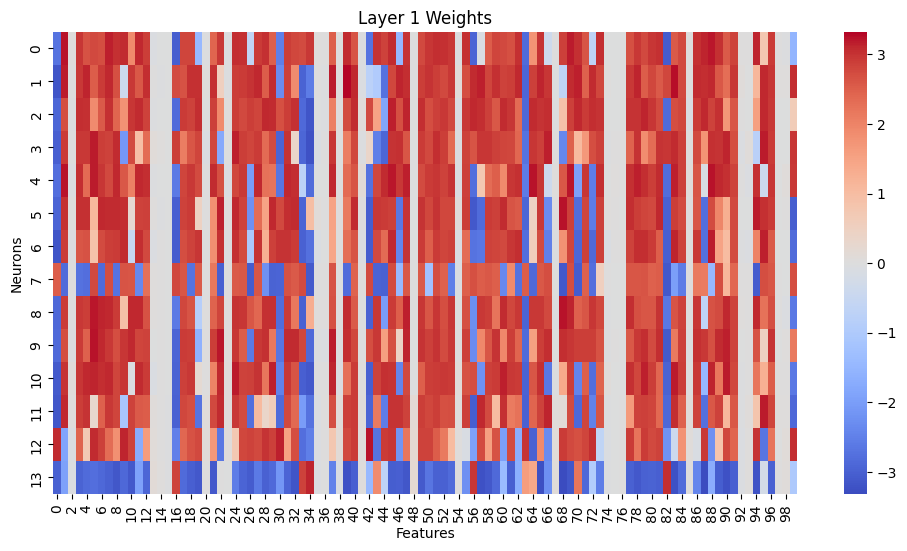

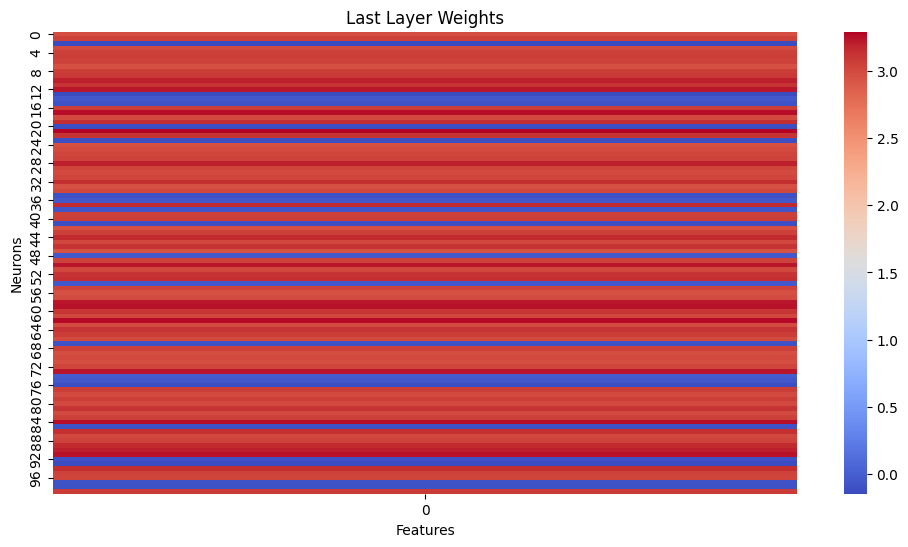

In [ ]:
#5.7
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


data2_no_outliers = data2[~((data2[numeric_features] < lower_bound) | (data2[numeric_features] > upper_bound)).any(axis=1)]

X = data2_no_outliers.drop(columns=['price'])
y = data2_no_outliers['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

mlp_reg.fit(X_train_scaled, y_train)

y_pred_mlp = mlp_reg.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("MLP Regressor MSE:", mse_mlp)
print("MLP Regressor R^2:", r2_mlp)

import numpy as np

weights = mlp_reg.coefs_
layer_1_weights = weights[0]
layer_last_weights = weights[-1]

plt.figure(figsize=(12, 6))
sns.heatmap(layer_1_weights, annot=False, cmap='coolwarm')
plt.title("Layer 1 Weights")
plt.xlabel("Features")
plt.ylabel("Neurons")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(layer_last_weights, annot=False, cmap='coolwarm')
plt.title("Last Layer Weights")
plt.xlabel("Features")
plt.ylabel("Neurons")
plt.show()
